### Importing dependencies

In [1]:
# to avoid warns about possible extra RAM usage during large clustering jobs.
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading the dataset into pandas dataframe

In [3]:
data = pd.read_csv("Mall_Customers.csv")

### exploratory data anaylysis

In [4]:
# displaying the first top five rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# TO display the number of rows snd columns 
data.shape

(200, 5)

In [6]:
#to see information of the dataset or the metadat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking if there is null value in each column
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# how many males and females are there 
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

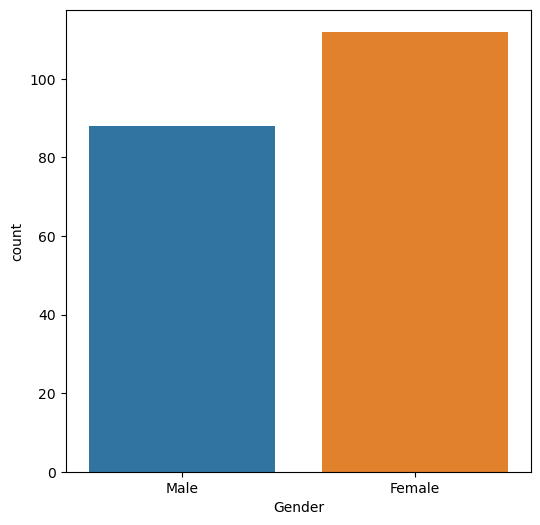

In [9]:
# visualizing gender 
plt.figure(figsize=(6,6))
sns.countplot(data = data,x=data['Gender'],hue='Gender')
plt.show()

##### In this dataset the number of females is greater than males

In [10]:
# to see the statistical distributio of the numericals
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
X = data.iloc[:,[3,4]].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### choosing the number of clusters (K)
### WCSS => with in cluster sum of squars

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
    

### Ploting the elbow graph

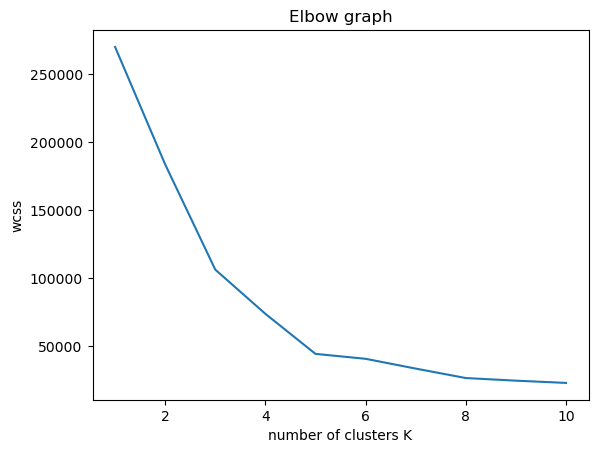

In [14]:
plt.plot(range(1,11),wcss)
plt.title("Elbow graph")
plt.xlabel("number of clusters K")
plt.ylabel("wcss")
plt.show()

#### so The optimum cluster k is 5

### Training the KMeans clustering model

In [15]:
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state=0)
kmeans.fit(X)


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


### Returning a label for each data point in their cluster 

In [16]:
# Y becomes an array of cluster labels assigned to each row of X.
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


##### so the 5 clusters are 
    0 , 1 , 2 , 3 , 4

### Visualizing the clusters

Breakdown:

    Y == 0 filters data points that belong to Cluster 0.

    X[Y==0,0] → Annual Income of cluster 0 points.

    X[Y==0,1] → Spending Score of cluster 0 points.

    s=30 → marker size.

    c='green' → color.

    label='Cluster 1' → name for the legend.

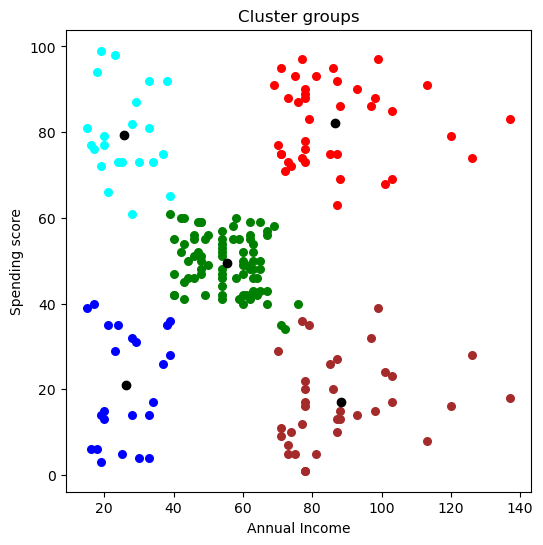

In [17]:
# ploting all the clusters and centroids
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0],X[Y==0,1], s=30 , c='green', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=30 , c='red',   label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=30 , c='brown', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=30 , c='blue',  label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=30 , c='cyan',  label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],c='black')
plt.title("Cluster groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

#### K-Means does two things:

(A) It clusters the training dataset

This is what you already did: divide your customers into cluster groups and analyze them.

(B) It learns cluster centers (centroids)

These centroids are a model.

Once trained, K-Means can take new, unseen customers and assign them to the nearest cluster.

So K-Means is both:

    an unsupervised learning algorithm, and

    a predictive model for future data.


### clustering new data

In [21]:
new_customer = [[105, 10]]   # income, spending score
cluster = kmeans.predict(new_customer)
print(cluster)


[2]
